- <주택가격 예측>
    - 주제 : 면적, 층수, 역까지_도보시간, 주변_편의시설_점수를 이용하여 주택가격을 예측하고자 함
    - 독립 변수 : 면적, 층수, 역까지_도보시간, 주변_편의시설_점수
    - 종속 변수 : 주택가격
    - 분석방법 : 종속변수의 연속형 데이터형태 -> 회귀분석으로 수행
    - 독립변수의 데이터형태 : 문자가 있다면 -> 숫자로 모두 변환해야됨(특히 범주형 문자인 경우)

##### <분석과정>
- 1. 데이터수집
- 2. 데이터 전처리(결측, 이상, 중복)
- 3. 데이터 탐색(시각적으로 현황 분석 및 인사이트 도출, 예측 가능한 주제 선별)
- 4. 데이터 가공(후처리, 필요한 특성 별도로 추출)
- 5. 데이터 특성간의 상관관계 확인
    - 선형관계 또는 수평관계인지 산점도 확인
    - 선형관계 분포 : 회귀분석 진행
    - 수평관계 분포 : 분류분석 진행
    - 상관관계 확인 : 상관성이 있는지 확인
- 6. 특성들의 유의미성(p-value) 검증(또는 상관관계 검증, 검정이라고도 함)
- 7. 상관관계 검증에 따른 데이터 가공(후처리 추가 진행, 필요한 특성 재정의)
- 8. 훈련하기
    - 훈련을 위한 전처리(특정공학적용 or 스케일링, 데이터 분리)
    - 훈련모델 생성
    - 훈련시키기
    - 훈련 및 검증(또는 테스트) 정확도(결정계수) 확인
    - 과적합 여부 판단
        - 과대 또는 과소적합이 발생한 경우 처리(데이터늘리기, 튜닝, 다른모델로 전환)
    - 테스트데이터로 예측하기
    - 평가하기(오차 확인하기)
        - 평균절대오차 (MAE), 평균제곱오차(MSE), 결정계수(R2-Score)
- 9. 최종 모델 선정
    - 여러 전처리 방법과 튜닝을 통해서 다방면으로 비교하여 가장 우수한 모델 선정
        - 선정 기준 : 훈련정확도와 검증(테스트)정확도 높고,
                            과적합여부(차이)가 작고,
                            테스트 평가결과의 정확도(결정계수, R2-Score)이 높고
                            오차율이 낮고
    ** 모델 최종 선정시 선정기준을 따르지만, 정확하게 구분이 어려운 경우에는 위 선정기준을 종합적으로 비교 분석하여 분석가가 결정하게 됨
- 10. 최종 선정된 모델을 이용하여 서비스 구현
    - 서비스 : 웹서비스(웹서버 및 DB서버 구축 기술 습득 후 진행), 어플리케이션 서비스(별도의 어플리케이션 기술 습득 후 진행) 등등..


In [1]:
### 라이브러리 정의
# - 데이터를 읽기 위한 라이브러리
import pandas as pd

# - 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 수치 계산 라이브러리
import numpy as np

# - 데이터 가공 라이브러리
from sklearn.model_selection import train_test_split

# - 선형회귀모델 라이브러리
from sklearn.linear_model import LinearRegression

# - 릿지 모델 라이브러리
from sklearn.linear_model import Ridge

# - 라쏘 모델 라이브러리
from sklearn.linear_model import Lasso

# - 변환기 모델(클래스) 라이브러리 정의
from sklearn.preprocessing import PolynomialFeatures

# - MAE 라이브러리 정의
from sklearn.metrics import mean_absolute_error

# - 데이터 스케일링 라이브러리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False

#### 데이터 읽어들이기

In [2]:
### 데이터 읽기
# 변수명 : df_org
file_path = "./data/01_회귀_주택가격예측_데이터셋_Row_1000.csv"
df_org = pd.read_csv(file_path)
df_org.head()

# 주택가격 단위 : 십만단위

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.167450
1,69.040391,27,21.442580,2.792623,11420.654974
2,153.858939,8,10.174919,2.803478,23286.484864
3,71.656510,20,48.844439,1.983254,7535.429045
4,177.556747,4,2.466979,4.395939,29848.361648


In [3]:
# 데이터 정보 확인(결측치 있는지 확인)
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   면적          1000 non-null   float64
 1   층수          1000 non-null   int64  
 2   역까지_도보시간    1000 non-null   float64
 3   주변_편의시설_점수  1000 non-null   float64
 4   주택_가격       1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [4]:
# 기초통계 확인해보기 (아파트임)
df_org.describe()

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.258806,15.300000,28.935722,5.663576,18486.887415
std,49.173936,8.695379,17.148260,2.583594,10427.177312
min,36.276450,1.000000,1.034263,1.011372,1312.073187
25%,75.918038,8.000000,14.529759,3.446698,9587.864073
50%,118.338542,15.000000,27.478162,5.717975,16434.524871
75%,159.802495,23.000000,42.964969,7.935390,26276.908661
max,203.987011,30.000000,59.983704,9.994926,44167.392672


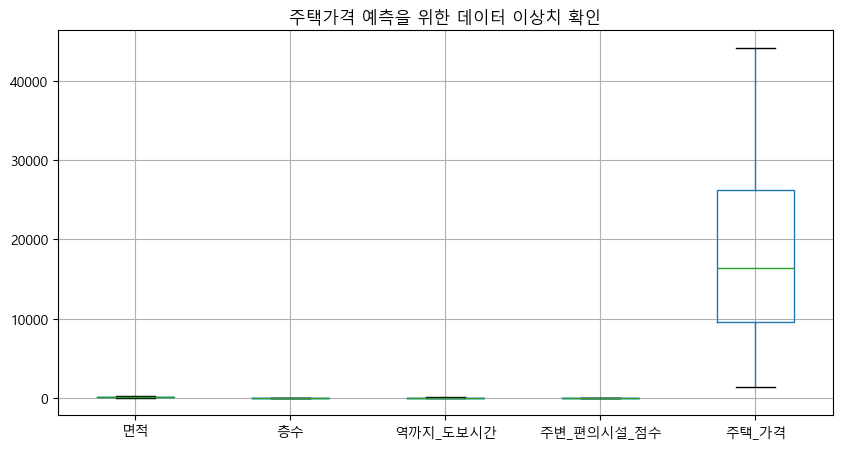

In [5]:
# 박스플룻으로 이상치를 시각적으로 확인해보기
plt.figure(figsize=(10, 5))
plt.title("주택가격 예측을 위한 데이터 이상치 확인")
### 박스플롯 그리기
df_org.boxplot()
plt.show()

In [6]:
# 중복데이터 확인
# 행단위 전체 중복 없음

df_org.duplicated().value_counts()

False    1000
Name: count, dtype: int64

#### 특성들 간의 관계 확인하기

- 특성들 간의 관계 확인하기
    - 상관관계 분석 : 선형 또는 비선형 확인
    - 상관관계는 표 또는 시각적으로 확인
    - 시각화의 경우 산점행렬도(산점도 그래프)를 사용
    - 확인 방법 : 종속변수를 기준으로 다른 특성들간의 관계를 확인하면 됨
    - 선형인 경우 : 회귀분석 진행
    - 비선형인 경우 : 분류분석 진행

- 상관관계에서 사용하는 용어
    - 표 : 상관관계표
    - 시각화 그래프 : 산점행렬도
    - 상관관계를 나타내는 값 : 상관계수

- 사용하는 함수
    - corr() : 상관관계 표 형태로 데이터를 제공해주는 함수

In [7]:
# 상관관계표 : corr()함수 사용(데이터프레임에 포함되어 있음)
correlation_matrix = df_org.corr()
correlation_matrix

"""(해석 방법)
    - 좌상향에서 우하향으로 대각선을 기준으로 왼쪽과 오른쪽은 대칭을 이루기에 한쪽을 기준으로 해석
    - 종속변수 특성을 기준으로 다른 특성들과 (독립변수들)과 비교한다.
    - 표에 나타난 숫자값들을 "상관계수"라고 칭함
     -- 상관계수 값은 "절대값"으로 해석 한다.
     -- 상관계수 값의 범위 : 0~1 사이의 값으로 표현됨(음수 값인 경우 -표시)
     -- 상관계수의 값이 1에 가까울수록 : 관계성이 좋다고 표현한다.
                       0에 가까울수록 : 관계성이 없다고 표현한다.
    - 상관계수 값이 음수인 경우 : "음의 상관관계"라고 해석
                              : "우하향"의 선형 형태를 나타낸다.(반비례)

    - 상관계수 값이 양수인 경우 : "양의 상관관계"라고 해석
                              : "우상향"의 선형 형태를 나타낸다.(비례)
    - 상관계수의 값이 1에 가까울 수록 "기울기가 급함"
                    0에  가까울 수록 "기울기가 완만함"
    - 선형 형태의 기울기가 급할 수록 : "선형성이 좋다 또는 선형성이 크다"고 표현한다.
                       완만할 수록 : "선형성이 나쁘다 또는 선형이 작다"고 표현한다.
"""

'(해석 방법)\n    - 좌상향에서 우하향으로 대각선을 기준으로 왼쪽과 오른쪽은 대칭을 이루기에 한쪽을 기준으로 해석\n    - 종속변수 특성을 기준으로 다른 특성들과 (독립변수들)과 비교한다.\n    - 표에 나타난 숫자값들을 "상관계수"라고 칭함\n     -- 상관계수 값은 "절대값"으로 해석 한다.\n     -- 상관계수 값의 범위 : 0~1 사이의 값으로 표현됨(음수 값인 경우 -표시)\n     -- 상관계수의 값이 1에 가까울수록 : 관계성이 좋다고 표현한다.\n                       0에 가까울수록 : 관계성이 없다고 표현한다.\n    - 상관계수 값이 음수인 경우 : "음의 상관관계"라고 해석\n                              : "우하향"의 선형 형태를 나타낸다.(반비례)\n\n    - 상관계수 값이 양수인 경우 : "양의 상관관계"라고 해석\n                              : "우상향"의 선형 형태를 나타낸다.(비례)\n    - 상관계수의 값이 1에 가까울 수록 "기울기가 급함"\n                    0에  가까울 수록 "기울기가 완만함"\n    - 선형 형태의 기울기가 급할 수록 : "선형성이 좋다 또는 선형성이 크다"고 표현한다.\n                       완만할 수록 : "선형성이 나쁘다 또는 선형이 작다"고 표현한다.\n'

#### 상관관계 매트릭스 히트맵 그리기

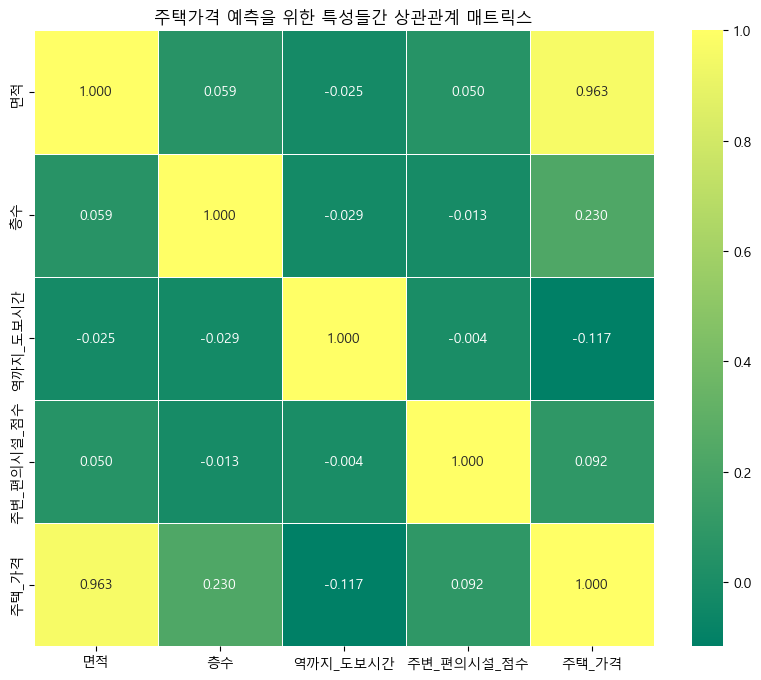

In [8]:
plt.figure(figsize=(10,8))
plt.title("주택가격 예측을 위한 특성들간 상관관계 매트릭스")
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", 
            cmap="summer", linewidths=0.5)
plt.show()

#### 산점행렬도 그리기

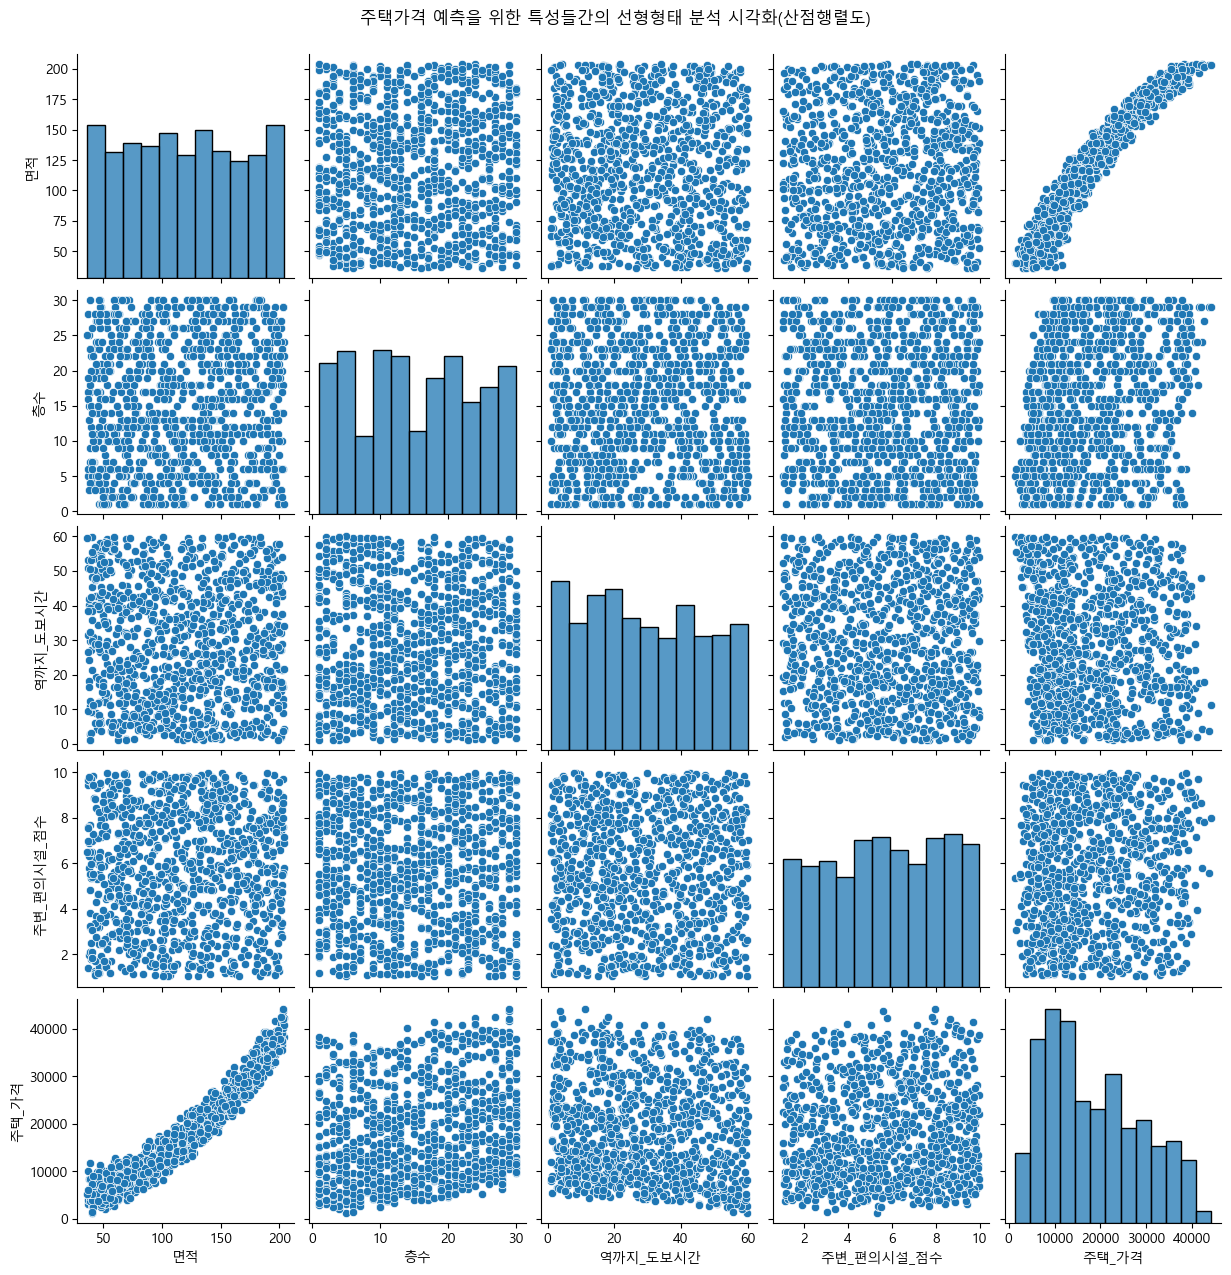

In [9]:
# 산점 행렬도 : 모든 특성들간의 관계를 산점도로 표현한 그래프
# - 사용그래프 : pairplot() 함수 사용
# - 원본 데이터 사용

sns.pairplot(df_org)
plt.suptitle("주택가격 예측을 위한 특성들간의 선형형태 분석 시각화(산점행렬도)", y=1.02)
plt.show()

# (해석)
# - 주택가격을 기준으로 면적, 층수, 도보시간, 편의시설점수 각각의
#   특성간의 선형관계를 확인한 결과
# - 주택가격과 면적간의 관계는 매우 높은 우상향 관계를 나타내고 있으며,
# - 편의시설점수간의 관계의 경우에는 매우 낮은 관계를 나타내고 있음
# - 주택가격을 예측하기 위한 특성들로 면적, 층수, 도보시간, 편의시설점수를 이용하여
#   분석을 진행할 경우, 모든 관계성이 선형분포르 나타내고 있으며,
#   종속변수로 사용한 주택가격의 데이터 형태가 연속형 데이터로,
#  --> 회귀분석으로 진행하는 것을 추천함
# - 단, 주택가격 특성의 경우에는 관계성이 매우 낮기에, 
#   우선 훈련에 적용하여 성능을 확인한 후
#   차후 훈련에서 제외한 후 성능을 확인하여
#   사전/사후의 성능 결과를 확인하여 제외할지 결정하면 될 것이다.

#### 상관관계 검증(검정) 하기 -> 유의미성(p-value) 확인

In [10]:
# 상관관계 검증(검정)을 위해서는 독립변수와 종속변수로 특성을 분리해야함
# - 독립변수 : 면적, 층수, 역까지_도보시간, 주변_편의시설_점수
# - 종속변수 : 주택_가격

df_org.head(1)

,면적,층수,역까지_도보시간,주변_편의시설_점수,주택_가격
0,121.146284,13,35.025575,9.100563,16601.16745


In [11]:
### 독립변수와 종속변수로 분리하기
# 독립변수명 : X (대문자)
X = df_org.iloc[:, :-1]
X

,면적,층수,역까지_도보시간,주변_편의시설_점수
0,121.146284,13,35.025575,9.100563
1,69.040391,27,21.442580,2.792623
2,153.858939,8,10.174919,2.803478
3,71.656510,20,48.844439,1.983254
4,177.556747,4,2.466979,4.395939
...,...,...,...,...
995,109.964997,7,47.173178,7.412281
996,37.051580,19,38.339751,7.545630
997,69.009828,27,1.159038,3.559802
998,132.588140,23,15.994720,1.331994


In [12]:
# 종속변수명 : y (소문자)
y = df_org["주택_가격"]
y

0      16601.167450
1      11420.654974
2      23286.484864
3       7535.429045
4      29848.361648
           ...     
995    12116.676007
996     6035.386052
997    12017.803413
998    20958.547577
999    14265.164818
Name: 주택_가격, Length: 1000, dtype: float64

- 상관관계 검증(검정) 방법
    - 1. 스피어만(Spearman) 상관관계 검정
        - 선형 또는 비선형 관계를 모두 포함하여 검정 가능
        - 보통 순위 형태의 데이터 특성(종속변수와 독립변수 각각) 간의 관계 확인에 사용
        - 예시 : 시험성적과 학업 성취도 간의 관계인 경우
                (시험 성적이 높을수록, 학업 성취도도 높아질까?)

    - 2. 피어슨(Pearson) 상관관계 검정
        - 선형 형태를 띄는 경우에 주로 사용되는 방법(비선형에서도 사용되기는 함)
        - 일반적으로 주로 사용되는 방법임
        - 보통 양적 크기 형태의 데이터 특성(종속변수와 독립변수 각각) 간의 관계 확인에 사용
        - 예시 : 온도와 아이스크림 판매량 간의 관계인 경우
            (날씨가 더우면, 아이스크림 판매량이 증가할까?)

- 상관관계 검증(검정)
    - 상관관계 검증은 종속변수와 독립변수 각각 간에 "유의미성"이 있는지 확인하는 절차임
    - 통계적 기법(통계학 이론)으로 사용된다.
        - 유의미성을 나타내는 이름: p-value
        - p-value의 값을 : "유의미 계수"라고 칭함

- 유의미 계수(p-value) 기준 해석(통상적인 통계학 기준으로 작성)
    - 1. p-value < 0.05 인경우
        - "유의미 함" 이라고 해석
        - 기무가설 기각, 대립가설을 채택하는 기준이 됨
        - 기무가설은 기존 이론, 대립가설은 새로운 이론
        - 새로운 이론, 즉 대립가설이 채택되어야만 연구진행이 가능함
    - 2. p-value >= 0.05인 경우
        - "유의미하지 않음" 이라고 해석
        - 기무가설 채택, 대립가설 기각의 기준이 됨
        - 새로운 이론으로 연구 진행 불가, 즉 주제 변경 또는 데이터 변경이 필요함을 의미함
    - 3. 유의미성의 해석 방법(글쓰기 방법)
        - p-value < 0.05인 경우 글 작성 방법
            - (잘못된 작성 예시) p-value의 값이 0.05보다 작기 때문에 유의미하다고 판단됨
            - (올바르게 작성된 예시) p-value < 0.05 이므로 유의미하다고 판단됨
    - 4. 유의미한 값의 범위 기준
        - 통계학에서는 통상적으로 0.05를 기준으로 하지만(이론상)
        - 연구하고자하는 분야에서 기존 사용된 허용치가 있다면, 그 기준을 이용하여도 됨
        - 만약 기존 연구의 허용치가 없다면, 통상적으로 0.05를 사용하지만
        - 0.1~0.05 사이의 값도 사용되는 경우가 있음
        - p-value < 0.05를 달리 해석하면, 신뢰구간 95% 이내로 만족함이라고 해석하기도 함

### 스피어만(Spearman) 상관관계 검정

In [13]:
# 라이브러리 정의
from scipy.stats import spearmanr

In [14]:
# 독립변수의 특성 이름 추출하기
# 독립변수 각각에 대한 상관관계 검증을 해야하기에 편의성을 위해서 이름 추출
x_columns_nm = X.columns
x_columns_nm

Index(['면적', '층수', '역까지_도보시간', '주변_편의시설_점수'], dtype='object')

In [15]:
# 독립변수 "면적"과 종속변수 "주택가격"과의 상관관계 검증(유의미성 확인)
X[x_columns_nm[0]]
spearmanr(X[x_columns_nm[0]], y)


# - 결과값 : 상관관계 대수(statistic), 유의미계수(value)

# (해석)
#  - p-value의 값이 0.05보다 작기 때문에 유의미하다고 판단됨
#  - 해석 : 독립변수 "면적"과 종속변수 "주택가격" 간의 스피어만 상관관계 검증 결과
#          p-value의 값이 0.0을 나타내고 있음
#          이는 p-value < 0.05를 만족하므로 유의미한 특성으로 판단됨

SignificanceResult(statistic=0.9704259944259946, pvalue=0.0)

In [16]:
# 모든 독립변수 각각에 대하여 종속변수와의 상관관계 유의미성을 확인해 보시오

for col in x_columns_nm :
    s, p = spearmanr(X[col], y)
    p_msg = "유의미 하지 않음"
    
    if p < 0.05 : 
        p_msg = "유의미 함"
        
    msg = f"""
        독립변수({col})와 종속변수(주택가격)의 상관관계 계수는 {s:.3f}이고, 
        pvalue의 값은 {p}임. 따라서 p-value < 0.05에 대하여 {p_msg}
    """
    print(msg)


        독립변수(면적)와 종속변수(주택가격)의 상관관계 계수는 0.970이고, 
        pvalue의 값은 0.0임. 따라서 p-value < 0.05에 대하여 유의미 함
    

        독립변수(층수)와 종속변수(주택가격)의 상관관계 계수는 0.238이고, 
        pvalue의 값은 2.2746428197022757e-14임. 따라서 p-value < 0.05에 대하여 유의미 함
    

        독립변수(역까지_도보시간)와 종속변수(주택가격)의 상관관계 계수는 -0.131이고, 
        pvalue의 값은 3.3483488710541014e-05임. 따라서 p-value < 0.05에 대하여 유의미 함
    

        독립변수(주변_편의시설_점수)와 종속변수(주택가격)의 상관관계 계수는 0.091이고, 
        pvalue의 값은 0.0038328936712809358임. 따라서 p-value < 0.05에 대하여 유의미 함
    


#### 2. 피어슨(Pearson) 상관관계 검증

In [17]:
# 라이브러리 정의
from scipy.stats import pearsonr

In [18]:
# 독립변수 "면적"과 종속변수 "주택가격"과의 상관관계 검증(유의미성 확인)
pearsonr(X[x_columns_nm[0]], y)

# 해석
# - p-value의 값이 0.05보다 작기 때문에 유의미하다고 판단됨
# 독립변수 "면적"과 종속변수 "주택가격" 간의 피어슨 상관관계 검증결과
# p-value의 값이 0.0을 나타내고 있음
# 이는 p-value < 0.05를 만족하므로 유의미한 특성으로 판단됨

PearsonRResult(statistic=0.9630633126017955, pvalue=0.0)

In [19]:
### (피어슨)모든 독립변수 각각에 대하여 종속변수와의 상관관계 유의미성을 확인해 주세요.
# - 반복 수행...
# - 출력결과 : 상관관계계수, pvalue, 유의미 여부 판단
for col in x_columns_nm :
    s, p = pearsonr(X[col], y)
    p_msg = "유의미 하지 않음"
    
    if p < 0.05 : 
        p_msg = "유의미 함"
        
    msg = f"""
        독립변수({col})와 종속변수(주택가격)의 상관관계 계수는 {s:.3f}이고, 
        pvalue의 값은 {p}임. 따라서 p-value < 0.05에 대하여 {p_msg}
    """
    print(msg)


        독립변수(면적)와 종속변수(주택가격)의 상관관계 계수는 0.963이고, 
        pvalue의 값은 0.0임. 따라서 p-value < 0.05에 대하여 유의미 함
    

        독립변수(층수)와 종속변수(주택가격)의 상관관계 계수는 0.230이고, 
        pvalue의 값은 1.8647105166225578e-13임. 따라서 p-value < 0.05에 대하여 유의미 함
    

        독립변수(역까지_도보시간)와 종속변수(주택가격)의 상관관계 계수는 -0.117이고, 
        pvalue의 값은 0.0002087983584937911임. 따라서 p-value < 0.05에 대하여 유의미 함
    

        독립변수(주변_편의시설_점수)와 종속변수(주택가격)의 상관관계 계수는 0.092이고, 
        pvalue의 값은 0.0037770587718518912임. 따라서 p-value < 0.05에 대하여 유의미 함
    


#### 훈련 : 검증 : 테스트 데이터로 분류하기

In [20]:
### 훈련 : 검증 : 테스트 = 6 : 2 : 2 비율로 분류
# - 사용 변수명 
# - 훈련 독립변수 / 종속변수 = X_train / y_train
# - 검증 독립변수 / 종속변수 = X_val / y_val
# - 테스트 독립변수 / 종속변수 = X_test / y_test

### (1단계 분류) 1000건 기준 -> 6 : 4 = 600건 : 400건
### (2단계 분류)  400건 기준 -> 5 : 5 = 200건 : 200건

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_val.shape,   y_val.shape)
print(X_test.shape,  y_test.shape)

(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


In [21]:
X_train

### 독립변수 각각의 값의 크기가 각기 다름(차이가 많음)
# - 스케일링 처리 후 훈련 진행

,면적,층수,역까지_도보시간,주변_편의시설_점수
24,147.720055,4,59.010382,8.423662
467,133.571978,18,36.130658,4.101974
539,76.228306,12,1.370025,4.171999
531,203.171102,18,9.040463,9.712274
618,118.390829,1,2.815335,4.943583
...,...,...,...,...
106,197.975016,25,53.018982,4.555207
270,126.034619,26,2.872185,5.268457
860,73.881485,29,36.328410,2.154055
435,148.191325,27,51.923694,9.518856


#### 스케일링 처리하기(전처리)

In [22]:
### Standard 스케일링으로 처리
# - 각 독립변수 명 : X_train_scaled, X_val_scaled, X_test_scaled

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_val_scaled   = ss.transform(X_val)
X_test_scaled  = ss.transform(X_test)

print(X_train_scaled.shape, y_train.shape)
print(X_val_scaled.shape,   y_val.shape)
print(X_test_scaled.shape,  y_test.shape)


(600, 4) (600,)
(200, 4) (200,)
(200, 4) (200,)


In [23]:
X_train_scaled

array([[ 0.56166844, -1.27923821,  1.76614552,  1.009849  ],
       [ 0.27606101,  0.32698017,  0.43473043, -0.67000955],
       [-0.88153652, -0.36139913, -1.58805752, -0.64279066],
       ...,
       [-0.92891185,  1.58900889,  0.44623805, -1.42717403],
       [ 0.57118197,  1.35954913,  1.35375755,  1.43555571],
       [ 1.16051318,  0.21225029, -0.7527668 ,  0.41443365]])

#### 모델 훈련하기

In [24]:
### 사용할 모델 라이브러리 정의
from sklearn.linear_model import LinearRegression

### 릿지, 라쏘 모델
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 앙상블 모델
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

### 경고 메세지 없애기
# - 사이킷런 버전에 따라 오류가 아닌 안내(경고) 메세지가 자주 나타남
# - 안내(경고) 메세지 없이 실행할 수 있도록 처리
from sklearn import set_config
set_config(display="text")

### 평가 라이브러리 정의
# 평균절대오차(MAE)
from sklearn.metrics import mean_absolute_error
# 평균제곱오차(MSE)
from sklearn.metrics import mean_squared_error
# 결정계수(R2-Score)
from sklearn.metrics import r2_score

#### 선형회귀 모델로 샘플링

In [ ]:
### 모델 생성 및 훈련
# - 정확도(결정계수) 확인 및 과적합 여부 판단
# - 검증 및 테스트 데이터로 예측
# - 검증 및 테스트 평가 각각 진행

# 모델 생성, 훈련
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

# 정확도 확인 및 과적합 여부 판단
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
print(f"훈련 결정계수 : {train_score}, 테스트 결정계수 : {test_score}, 과적합여부 : {train_score - test_score}")

# 검증 및 테스트 데이터로 예측 평가
train_pred =  lr.predict(X_train_scaled)
val_pred =  lr.predict(X_val_scaled)
test_pred = lr.predict(X_test_scaled)

train_mae = mean_absolute_error(y_train,train_pred)
val_mae = mean_absolute_error(y_val, val_pred)
test_mae = mean_absolute_error(y_test, test_pred)

train_mse = mean_squared_error(y_train,train_pred)
val_mse = mean_squared_error(y_val, val_pred)
test_mse = mean_squared_error(y_test, test_pred)

train_r2 = r2_score(y_train,train_pred)
val_r2 =r2_score(y_val, val_pred)
test_r2 = r2_score(y_test, test_pred)

# 결과 확인하기
print(f"훈련(MAE) : {train_mae}, 검증(MAE) : {val_mae}, 테스트(MAE) : {test_mae}")
print(f"훈련(MSE) : {train_mse}, 검증(MSE) : {val_mse}, 테스트(MSE) : {test_mse}")
print(f"훈련(R2) : {train_r2}, 검증(R2) : {val_r2}, 테스트(R2) : {test_r2}")

훈련 결정계수 : 0.9669915339286245, 테스트 결정계수 : 0.9663244451203648, 과적합여부 : 0.0006670888082597193
예측 결과 : [20789.75821843 21256.62445685 10450.99888208 37765.58732692
 16723.48563156 11799.69551084  5965.50437955 26981.63953646
 22661.91487351 33384.03519733  1184.35749223 28700.30490708
 13048.95710652 25664.97635081  6147.93543521  5658.17850583
   582.06604808 26211.87591606  6622.33602302  9554.40918921
  2565.03760175 25563.22350707 15140.27915941  9000.91372357
  9760.73470499  3279.52079084 26962.79480177 22763.46513602
 15087.04663704  -276.11498912 18633.67603341 13433.59186903
  7616.17988774 17282.12373888 10244.58653021 10056.07267371
  9041.23406215  9997.10526197 34289.39534286 11215.50961385
 33638.09027255 12963.35567752 10381.99731457 29072.72124194
  2389.87430694 32702.1482302  35466.0931592  34530.29226604
  5543.05679933 25720.14562223 35850.04711162 30097.56550417
 12628.57636274 28550.86110702 11037.44718035 14575.2080877
 37673.72224375 10310.47458789 33795.61306301 33